In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv('iris.csv')
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [6]:
X=data.drop(columns=['species'])
y=data['species']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix



Model Evaluation
Accuracy : 1.0

Classification Report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Enter the following features for prediction:
Sepal Length (cm): 10
Sepal Width (cm): 20
Petal Length (cm): 30
Petal Width (cm): 40

Predicted Species: virginica


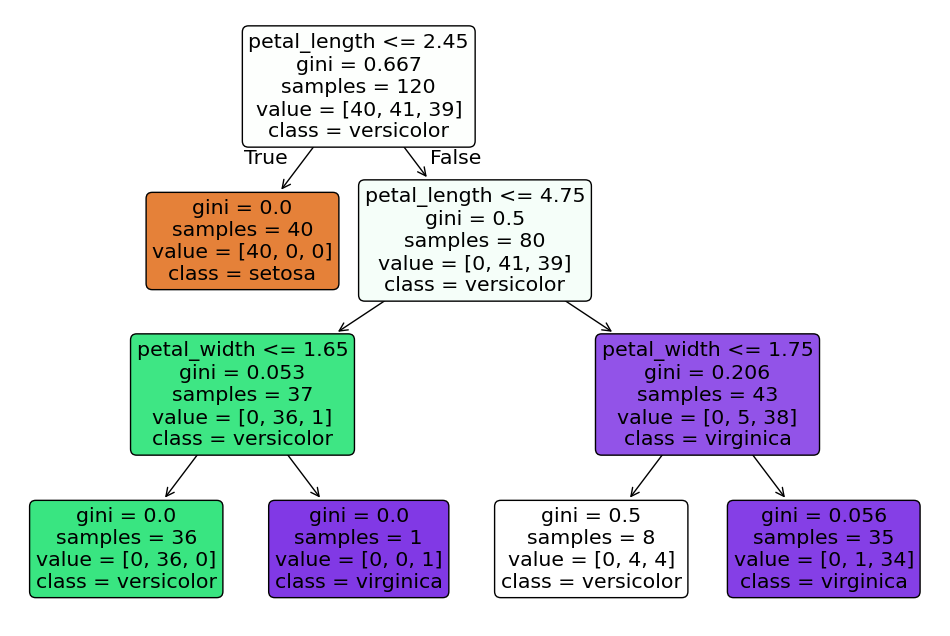

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

clf=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("\nModel Evaluation")
print(f"Accuracy : {accuracy_score(y_test, y_pred)}") # Call accuracy_score function
print("\nClassification Report : \n", classification_report(y_test, y_pred)) # Add a comma
print("\nConfusion Matrix : \n",confusion_matrix(y_test, y_pred)) # Add a comm

plt.figure(figsize=(12,8))

plot_tree(
    clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True
)


#User Input Prediction Function
def predict_user_input():
    print("\nEnter the following features for prediction:")
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))

    # Prepare the input for prediction
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=X.columns)
    prediction = clf.predict(input_data)[0]
    print(f"\nPredicted Species: {prediction}")

# Call user input prediction
predict_user_input()